<a href="https://colab.research.google.com/github/jakubtwalczak/dsbootcampudemy/blob/main/6_Uczenie_maszynowe/6_Regresja_logistyczna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wprowadzenie.

Pomimo nazwy jest to liniowy model do zadań klasyfikacyjnych. Inna nazwa Logit Regression.

Przykłady zastosowań:
- przewidywanie czy mail jest spamem, czy też nie
- przewidywanie czy użytkownik kliknie w reklamę
- przewidywanie czy nowotwór jest złośliwy czy też nie
- przewidywanie czy dłużnik spłaci wierzycielowi dług, czy też zajdzie zdarzenie default
- przewidywanie czy transakcja jest próbą oszustwa

Przy budowie modelu regresji logistycznej wykorzystamy funkcję sigmoid. Definiuje się ją wzorem:
$$sigmoid(x) = \frac{1}{1+e^{-x}}$$

Funkcja ta ma dziedzinę w zbiorze liczb rzeczywistych i spłaszcza ją do przedziału 0 - 1, przy czym wartości funkcji nigdy nie osiągają dolnej i górnej granicy przedziału.

Text(0.5, 1.0, 'Sigmoid Function')

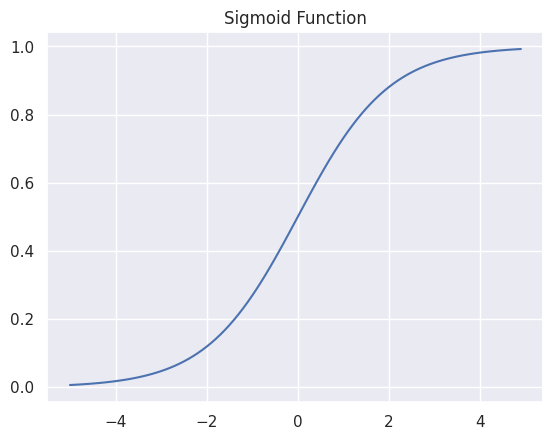

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns

sns.set()
np.random.seed(10)
np.set_printoptions(precision=6, suppress=True)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = np.arange(-5, 5, 0.1)
y = sigmoid(X)
plt.plot(X, y)
plt.title('Sigmoid Function')

Następnie rozważmy model liniowy $Y = w_0 + w_1X_1$. Podstawiając to do funkcji sigmoid otrzymujemy:
$$LOG\_REG(Y) = \frac{1}{1 + e^{-(w_0 + w_1X_1)}}$$
Dzięki temu przekształceniu regresja logistyczna zwraca nam wartości z przedziału $(0, 1)$ co możemy interpretować jako prawdopodobieństwo i na podstawie tych prawdopodobieństw przewidywać poszczególne klasy.

Ogólnie rzecz ujmując, wartość przewidziana przy użyciu regresji liniowej jest spłaszczana poprzez umieszczenie liczb do niej przeciwnej jako wykładnika potęgi liczby Eulera.

Generalnie model regresji logistycznej najlepiej sprawdza się w zadaniach **klasyfikacji binarnej**. Wartość, jaką przyjmuje funkcja sigmodalna, jest przyjmowana jako prawdopodobieństwo przynależności do klasy.

# Załadowanie danych.

Załadujemy zbiór danych dot. raka piersi z biblioteki Scikit-learn.

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
print(data)

{'data': array([[ 17.99   ,  10.38   , 122.8    , ...,   0.2654 ,   0.4601 ,
          0.1189 ],
       [ 20.57   ,  17.77   , 132.9    , ...,   0.186  ,   0.275  ,
          0.08902],
       [ 19.69   ,  21.25   , 130.     , ...,   0.243  ,   0.3613 ,
          0.08758],
       ...,
       [ 16.6    ,  28.08   , 108.3    , ...,   0.1418 ,   0.2218 ,
          0.0782 ],
       [ 20.6    ,  29.33   , 140.1    , ...,   0.265  ,   0.4087 ,
          0.124  ],
       [  7.76   ,  24.54   ,  47.92   , ...,   0.     ,   0.2871 ,
          0.07039]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

Wyodrębniamy z naszego zbioru zbiór zmiennych niezależnych i zmienną docelową.

In [3]:
X = data.data
y = data.target

print(f'shape X: {X.shape}')
print(f'shape y: {y.shape}')

shape X: (569, 30)
shape y: (569,)


Dla lepszego wglądu w dane treningowe wyświetlimy sobie w formie ramki danych. Zajrzyjmy również w informacje o obiekcie i podstawowe statystyki opisowe zmiennych niezależnych.

In [4]:
df = pd.DataFrame(data=X, columns=data.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Dane podzielimy na zbiór treningowy i testowy znaną nam już funkcją **train_test_split**.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (426, 30)
y_train shape: (426,)
X_test shape: (143, 30)
y_test shape: (143,)


# Dopasowanie modelu.

Importujemy klasę **LogisticRegression**. Instancji modelu podamy parametr max_iter, w przeciwnym razie pojawi się ostrzeżenie o osiągnięciu maksymalnej liczby iteracji.

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Metoda **predict_proba** zwróci dla każdej próbki prawdopodobieństwa przynależności do klasy 0 i klasy 1 (sumują się one do 1 w wierszach).

In [9]:
y_prob = model.predict_proba(X_test)
y_prob

array([[0.992904, 0.007096],
       [0.000002, 0.999998],
       [0.000505, 0.999495],
       [0.999962, 0.000038],
       [0.000759, 0.999241],
       [0.000357, 0.999643],
       [0.000025, 0.999975],
       [0.587609, 0.412391],
       [0.999999, 0.000001],
       [0.994401, 0.005599],
       [0.00003 , 0.99997 ],
       [0.000038, 0.999962],
       [0.782952, 0.217048],
       [0.000262, 0.999738],
       [0.999814, 0.000186],
       [0.995717, 0.004283],
       [0.00019 , 0.99981 ],
       [0.134485, 0.865515],
       [0.016369, 0.983631],
       [0.830222, 0.169778],
       [0.89531 , 0.10469 ],
       [0.591913, 0.408087],
       [0.000855, 0.999145],
       [0.0145  , 0.9855  ],
       [1.      , 0.      ],
       [1.      , 0.      ],
       [0.104846, 0.895154],
       [1.      , 0.      ],
       [0.000144, 0.999856],
       [0.055998, 0.944002],
       [0.000253, 0.999747],
       [0.000512, 0.999488],
       [1.      , 0.      ],
       [0.000145, 0.999855],
       [0.0511

Z kolei zastosowanie metody **predict** od razu zwraca nam klasy predykowane przez model.

In [10]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0])

# Ocena modelu.

Do oceny wykorzystamy metrykę dokładności i macierz pomyłek w formie graficznej.

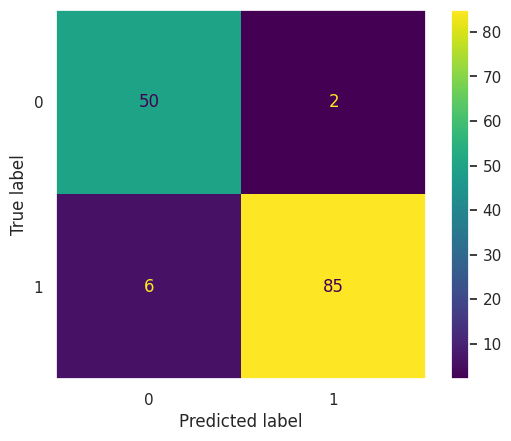

Accuracy: 0.9440559440559441


In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.grid(False)
plt.show()

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Sprawdzimy model również pod kątem innych metryk przy pomocy raportu z klasyfikacji. Jest to o tyle istotne w przypadku tego modelu, iż klasy są nierówno reprezentowane.

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.89      0.96      0.93        52
      benign       0.98      0.93      0.96        91

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143

